In [1]:
# 지금까지는 확률적 분별 모형에 대해 공부했다.
# 확률적 분별 모형은 각각의 클래스일 확률을 각각 계산해서 가장 확률이 큰 클래스를 선택하는 것
    # 크게 두가지 방법이 있다. 하나가 판별형으로 돼 있는 확률론적 판별모형
    # x에 대한 y의 조건부확률을 구하는 확률적 모형을 함수의 형태로 가정하고 모수를 추정하는 방법으로 바로 찾아내는 것이 discriminant probability 모델
    # 로지스틱 회귀, 디시전 트리가 이런 모양이었다.
    # 디시전 트리를 앙상블로 활용한 랜덤포레스트, 그레디언트 부스트
    
    # 또 하나가 확률론적 생성모형
    # y에 대한 x의 확률(가능도)을 찾아내기 위해 먼저 베이즈 정리를 사용해 거꾸로 y의 확률 추정하는 방법이 있었다
    # 이때는 가능도가 어떤 함수 모양이 되는지를 함수 형태로 가정하고 모수를 찾아내는 방법을 썼다.
    # 왜 복잡하게 돌아서 갈까? 두 가지 이점이 있다.
    # 가장 큰 이점은 나이브 가정이라는 것을 쓸 수 있다. 각각의 독립변수가 조건부 독립으로 분리가 된다는 가정
    # 분리가 가능하면 모수 추정할 때 예를들어 100만개의 독립변수가 있다고 하면 100만개의 독립변수를 가진 함수의 모수를 찾아내는 건 굉장히 힘들다
    # 그런데 함수가 변수 하나밖에 없는 함수의 모수를 찾아내는 건 간단하다.
    # 독립변수의 개수가 많을 때 나이브 가정이 도움이 된다. 텍스트 분석에 대한 걸 할 때 이게 많이 쓰인다
    # 텍스트가 아닐 때는 그때는 판별 가능도 모델을 더 많이 쓴다
    # 너무 변수가 많게 되면 나이브베이즈 같은 형태로 풀어야 한다

In [2]:
# 오늘부터는 확률을 쓰지 않는 방법을 공부
# 하나는 퍼셉트론, 하나는 서포트벡터머신

# 퍼셉트론

In [3]:
# 뉴럴네트워크, 딥러닝 공부하게 되면 퍼셉트론이 확장돼 딥러닝 모델이 된다

퍼셉트론(perceptron)은 가장 오래되고 단순한 형태의 판별함수기반 분류모형 중 하나이다.

<img src="https://datascienceschool.net/upfiles/102ba905e4f945deaaac794364123877.png" style="width: 100%;">

In [4]:
# 앞에 들어있는 1은 상수항 오그먼트(추가)가 된 독립변수 벡터가 있다고 하는 것
# 이에 가중치 마스크를 씌우는 것
# +1, -1로 구한 y hat과 실제 y값 사이의 손실함수를 구한 다음에 이 손실함수를 미분한 그레디언트 벡터값을 찾아서 그걸로 가중치를 갱신함

그림 45.1 : 퍼셉트론

퍼셉트론은 입력 $x = (1, x_1, \cdots, x_m)$에 대해 1 또는 -1의 값을 가지는  $y$를 출력하는 비선형 함수이다. 1을 포함하는 입력 요소 $x_i$에 대해 가중치 $w_i$를 곱한 값 $a = w^Tx$을 활성화값(activations)이라고 하며 이 값이 판별함수의 역할을 한다.

$$ a = w^T x $$

판별 함수 값이 활성화함수(activation function) $h(a)$를 지나면 분류 결과를 나타내는 출력 $\hat{y}$가 생성된다.

$$ \hat{y} = h(w^Tx) $$

퍼셉트론의 활성화 함수는 부호함수(sign function) 또는 단위계단함수(Heaviside step function)라고 부르는 함수이다.

$$ h(a) = \begin{cases} -1, & a < 0, \\ 1, & a \ge 0 \end{cases} $$

In [11]:
# 1과 0이 아니라 1과 -1이다

In [6]:
# 활성화 값(activations, activation value)
     # 나중에 딥러닝에서도 쓰인다
# 퍼셉트론의 활성화 함수는 부호함수로 쓰지만, 딥러닝에서는 부호함수 사용하지 않고, 로지스틱 함수, 렐루 함수, 하이퍼~탄젠트 함수 등을 사용한다

## 퍼셉트론 손실함수

In [7]:
# 나쁘면 점점 커지는 손실함수

다음과 같이 $N$개의 학습용 데이터가 있다고 하자.

$$ (x_1, y_1), (x_2, y_2), \ldots, (x_i, y_i), \ldots, (x_N, y_N) $$

퍼셉트론은 독립변수 $x$로부터 종속변수 $y$를 예측하는 예측 모형이므로 모든 학습 데이터에 대해 예측 오차를 최소화하는 가중치 $w$를 계산해야 한다. 가중치 $w$에 따라 달라지는 전체 예측 오차 $L$는 $i$번째 개별 데이터에 대한 손실함수 $L_i(\hat{y}_i, y_i)$의 합으로 표현할 수 있다.

$$
L = \sum_{i=1}^N L_i(y_i, \hat{y}_i)
$$

손실 $L_i(y_i, \hat{y}_i)$는 실제값 $y$와 예측값 $\hat{y}$의 차이를 나타내는 함수이다. 
회귀 분석에서는 $L(\hat{y}, y) = -(y - \hat{y})^2 $과 같은 손실함수를 많이 사용하였지만 퍼셉트론의 경우에는 다음과 같은 손실 함수를 사용한다.
이를 제로-원 **손실함수(zero-one loss function)**이라고 한다.

$$
L_i(y_i, \hat{y}_i) = \max(0, -y_i\hat{y}_i)
$$

제로-원 손실함수 $L_i$은 $\hat{y}$과 $y$가 같으면 0이고 다르면 1이다. 다음처럼 서술할 수도 있다.

$$
L_i(\hat{y}) =
\begin{cases}
\frac{1}{2}(\text{sgn}(-\hat{y}) + 1) & \text{ if } y = 1 \\
\frac{1}{2}(\text{sgn}(\hat{y}) + 1)& \text{ if } y = -1 \\
\end{cases}
$$


In [9]:
# 회귀분석할 때는 손실함수로 커지면 안 되는 함수, 줄이려고 목표로 했던 함수가 오차 제곱합을 썼었다
# 퍼셉트론에서는 여러가지 손실함수를 골라서 쓸 수 있다
    # 제일 처음 제안 됐던 것이 제로원 손실함수. y와 y hat을 곱하고 -를 붙인 값이 0보다 큰 값만 고르는 것
    # 결국 제로-원 손실함수는 정답 맞혔을 때는 벌점 0, 오답 맞췄을 때는 벌점 1


전체 손실함수는

$$
L = \sum_{i=1}^N \max(0, -y_i\hat{y}_i) = - \sum_{i \in M}  y_i\hat{y}_i
$$

가 된다.
이 식에서 $M$은 오분류(misclassification)된 데이터의 집합이다. $y$와 $\hat{y}$값이 다르면 오분류된 것이다. 

$$
\begin{aligned} 
\hat{y} =    y & \rightarrow & \text{right classficiation} \\ 
\hat{y} \neq y & \rightarrow & \text{misclassification}
\end{aligned}
$$

그런데 제로-원 손실함수를 쓰면 $\hat{y}(x)$가 $x$에 대한 계단형 함수이므로 대부분의 영역에서 기울기가 0이 되어 미분값으로부터 최소점의 위치를 구할 수 없다. 따라서 퍼셉트론에서는 $\hat{y}$ 대신 활성화값 $w^Tx$를 손실함수로 사용한다. 

$$
L_P(w) = - \sum_{i \in M} y_i \cdot w^Tx_i 
$$

이를 **퍼셉트론 손실함수(perceptron loss function)** 또는 **0-힌지 손실함수(zero-hinge loss function)**라고 한다. 여기에서 손실값은 오분류된 표본에 대해서만 계산한다는 점에 주의하라. 이 때는 $y$와 $\text{sgn}(\hat{y})$값이 다르면 오분류된 것이다.

$$
\begin{aligned} 
\text{sgn}\hat{y} =    y & \rightarrow & \text{right classficiation} \\ 
\text{sgn}\hat{y} \neq y & \rightarrow & \text{misclassification}
\end{aligned}
$$

퍼셉트론 손실함수는 다음처럼 표기할 수도 있다.

$$
L_{P,i}(\hat{y}) =
\begin{cases}
-\frac{1}{2}w^Tx\,(\text{sgn}(-\hat{y}) + 1) & \text{ if } y = 1 \\
\frac{1}{2}w^Tx\,(\text{sgn}(\hat{y}) + 1)& \text{ if } y = -1 \\
\end{cases}
$$

In [12]:
# 전체 손실함수는 틀린 문제에 대해서만 벌점을 매기고 더하기를 하겠다는 것
# 전체 손실함수는 계단식 형태로 나온다.
# 계단식 형태로 나오면 우리가 이때까지 써왔던 수치적 최적화 방법을 못 쓴다
# 미분 벡터를 이용해야 하는데 미분 벡터가 다 0이 되기 때문
# 그래서 퍼셉트론 손실함수의 형태로 쓴다
    # 원래는 활성화 값이 활성화 함수를 통과한 형태로 써야 하는데 여기선 활성화 값을 그대로 쓴다
    # 더 이상 +1, -1 값만 가지지 않는다. + 무한대부터 -무한대까지의 값을 다 가질 수 있다
    # 각각의 기울기가 존재하는 형태로 바뀐다

## 가중치 계산

In [14]:
# 최적화를 위해 가중치로 미분

퍼셉트론 손실함수 $L_P(w)$를 최소화하는 $w$를 찾기 위해 $L_P(w)$를 $w$로 미분하여 그레디언트를 구하면 다음과 같다.

$$
\dfrac{dL_P}{dw} = - \sum_{i \in M} x_i y_i
$$

그레디언트 디센트(gradient descent) 방법을 사용하면 다음과 같이 $w$를 갱신할 수 있다.

$$
\begin{eqnarray}
w_{k+1} 
&=& w_{k} + \eta_k \sum_{i \in M} x_i y_i \\
\end{eqnarray}
$$

여기에서 $\eta$는 스텝사이즈(step size) 또는 학습속도(learning rate)라고 한다.

실제로는 계산량을 줄이기 위해 전체 오분류 데이터 집합 $M$ 중에서 하나만 골라서 사용한다. 다음 식에서 $m$은 오분류된 데이터 중의 하나를 무작위로 고른 것이다. ($m \in M$)

$$ w_{k+1} = w_{k} + \eta_k  x_m y_m $$

또 $\hat{y}$이 $1$또는 $-1$의 값만 가질 수 있으므로 실제로는 다음과 같은 식이 된다.

$$ 
w_{k+1} =
\begin{cases} 
w_{k} + \eta_k x_m  & \text{ if } \hat{y}_m = 1 \neq y_m \\ 
w_{k} - \eta_k x_m, & \text{ if } \hat{y}_m = -1 \neq y_m \\ 
\end{cases}
$$

그런데 퍼셉트론 손실함수는 원래의 손실함수와 정확하게 같지 않기 때문에 이러한 방식으로 학습을 했을 때 매 단계마다 반드시 원래의 손실함수가 감소한다는 보장은 없다. 다만 **퍼셉트론 수렴 정리(perceptron convergence theorem)**로부터 데이터가 선형분리(linearly separable)가능한 경우에는 완전분류모형으로 수렴한다는 것이 증명되어 있다.

In [17]:
###  y_i의 값은 +1, -1이므로 결국 벡터 x의 방향으로 w값을 옮기는 것이 됨. x는 트레이닝 데이터

In [6]:
# 원래 오분류된 데이터는 다 합쳐져야 한다. 그런데 계산으로 시간이 많이 걸리게 된다
# 오리지널 퍼셉트론은 트랜지스터 컴퓨터가 없을 때 만들어진 알고리즘
# 그래서 초기의 퍼셉트론 계산에서는 Stochastic Gradient Desecent 방법을 썼다
# 오뷴류 데이터 전부를 사용하지 않고 일부 데이터만을 사용함. 틀린 것 중에 딱 하나만 썼다
# 퍼셉트론 수렴정리. 수학적으로 증명돼 있다. 하나만 골라서 해도 수렴이 늦어질 뿐이지 언젠가는 똑같은 위치로 수렴한다.

## Scikit-Learn 의 퍼셉트론 구현

Scikit-Learn에서 제공하는 퍼셉트론 모형인 `Perceptron` 클래스는 다음과 같은 입력 인수를 가진다.

* `max_iter`: 최적화를 위한 반복 횟수(iteration number)
* `eta0`: 학습속도 $\eta$
* `n_iter_no_change`: 이 설정값만큼 반복을 해도 성능이 나아지지 않으면 `max_iter` 설정값과 상관없이 멈춘다.

## 퍼셉트론 실행 예

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X = iris.data[idx, :2]
y = (iris.target[idx] / 2).astype(np.int)

from sklearn.linear_model import Perceptron

def plot_perceptron(n):
    model = Perceptron(max_iter=300, shuffle=False, tol=0, n_iter_no_change=1e9).fit(X, y)
    XX_min = X[:, 0].min() - 1
    XX_max = X[:, 0].max() + 1
    YY_min = X[:, 1].min() - 1
    YY_max = X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                         np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Set3)
    plt.scatter(X[y==0, 0], X[y==0, 1], c='w', s=100, marker='o', edgecolor='k')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='k', s=100, marker='x', edgecolor='k')
    plt.xlabel("꽃받침의 길이")
    plt.ylabel("꽃받침의 폭")
    plt.title("붓꽃 데이터(setosa/virginica)")
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.grid(False)
    plt.show()


from ipywidgets import widgets
widgets.interact(plot_perceptron, n=widgets.IntSlider(min=1, max=100, step=1, value=1));

interactive(children=(IntSlider(value=1, description='n', min=1), Output()), _dom_classes=('widget-interact',)…

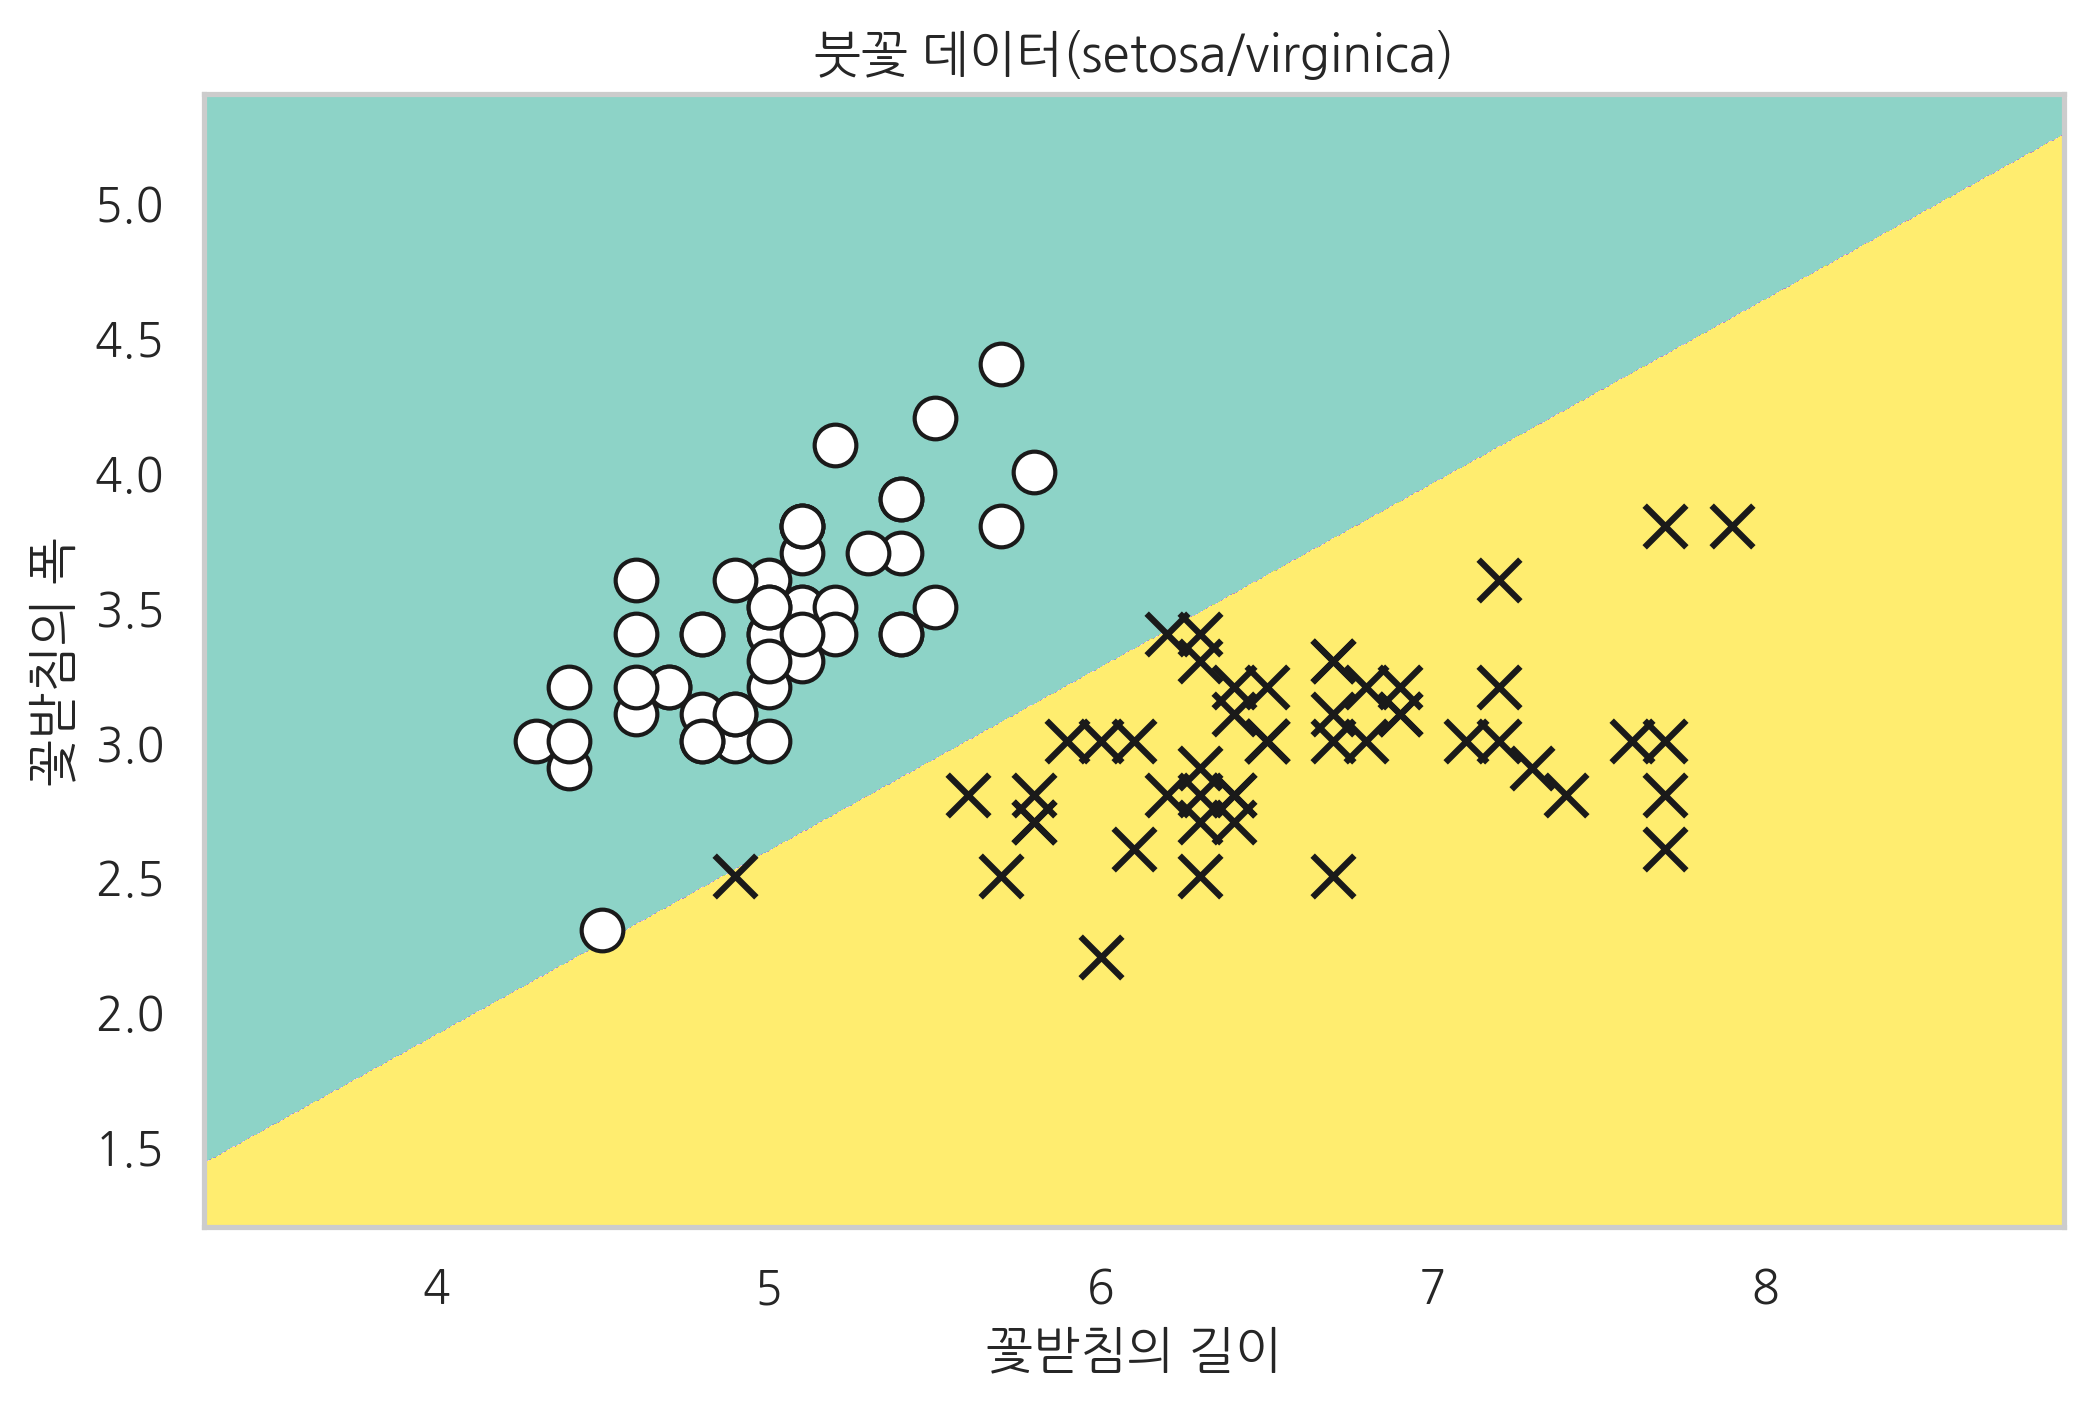

In [2]:
plot_perceptron(300)

In [3]:
from sklearn.metrics import confusion_matrix, classification_report

model = Perceptron(max_iter=400, shuffle=False, tol=0, n_iter_no_change=1e9).fit(X, y)
confusion_matrix(y, model.predict(X))

array([[50,  0],
       [ 0, 50]])

## 학습 성능

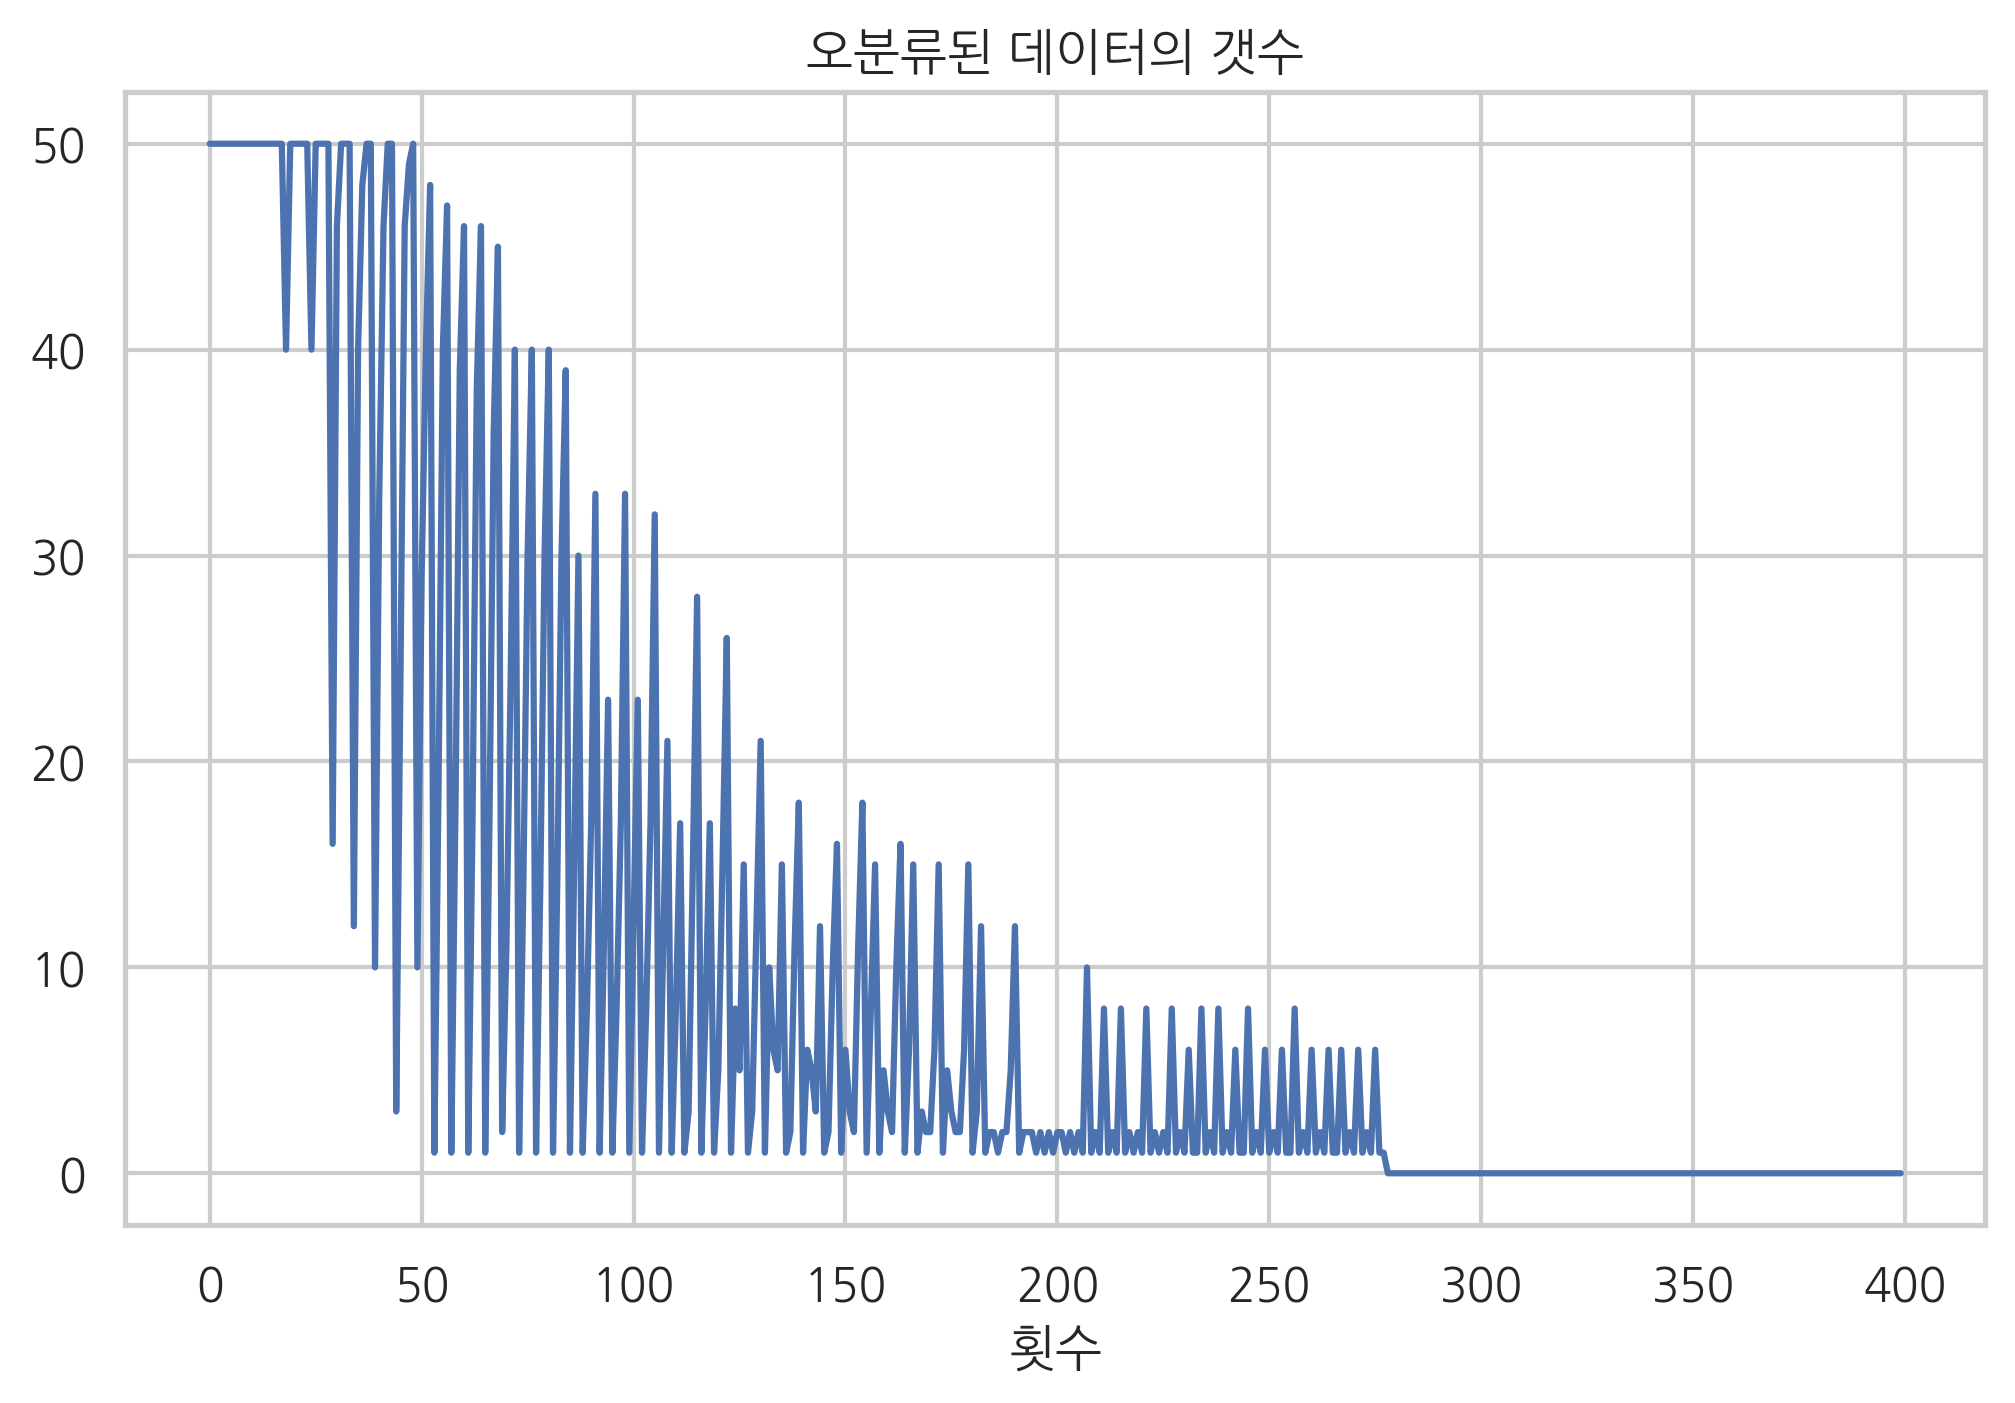

In [4]:
n = 400
loss = np.zeros(n)
model = Perceptron(warm_start=True, shuffle=False)
for i in range(n):
    model.partial_fit(X, y, classes=[0, 1])
    loss[i] = np.sum(y != model.predict(X))

plt.plot(loss)
plt.xlabel("횟수")
plt.title("오분류된 데이터의 갯수")
plt.show()

## SGD (최적화)

In [9]:
# 하나의 오분류 데이터만을 쓰지 말고 여러개를 쓰기 위해 SGD 최적화
# 미니배치라고 부르는 일부 데이터만 사용해 그레디언트의 기댓값 추정치 이용
# 퍼셉트론은 오분류된 데이터만 이용하는 SGD의 일종이다

SGD(Stochastic Gradient Descent) 방법은 손실함수 자체가 아니라 손실함수의 기댓값을 최소하는 방법이다.

$$ \arg \min \text{E}[L] $$

전체 손실함수 $L$는 개별 데이터의 손실함수 $L_i(\hat{y}_i, y_i)$의 합이다.

$$ E = \sum_{i} L_i(\hat{y}_i, y_i) $$ 

SGD 최적화 방법은 그레디언트가 아니라 그레디언트의 기댓값의 추정치를 이용한다.

$$
\begin{eqnarray}
w_{k+1} 
&=& w_{k} + \text{E}[\nabla L] \\
\end{eqnarray}
$$

그레디언트의 기댓값의 추정치는 표본 평균이다. 즉 모든 학습용 데이터를 다 사용하여 그레디언트를 구하는 것이 아니라 미니배치(minibatch)라고 부르는 일부의 데이터만 사용하여 그레디언트 추정치를 구한다. 따라서 한번의 계산량이 많거나 학습데이터가 많은 딥러닝(deep learning)에 사용된다. 
퍼셉트론은 오분류된(mis-classified) 데이터만 이용하는 SGD의 일종이다.

SGD 방법이 기댓값이 최소화되도록 수렴한다는 것은 다양한 논문에서 증명이 되어 있다. 다만 손실함수 자체를 최적화하는 것이 아니라 손실함수의 기댓값의 추정치를 최대화하기 때문에 손실함수값이 전반적으로 감소하는 추세를 보이는 것 뿐이고 항상 절대적으로 감소한다는 보장은 없다.

In [10]:
# 손실함수의 기댓값의 추정치를 최대화하기 떄문에 손실함수 값이 전반적으로 감소하는 추세를 보인다!

SGD에서는 제로-원이나 퍼셉트론 손실함수 이외에도 손실함수가 볼록함수(convex function)이면 모두 개별 데이터 손실함수로 사용할 수 있다. 
다음 그림에서는 $y=1$인 경우 많이 사용되는 손실함수의 값을 나타내었다.


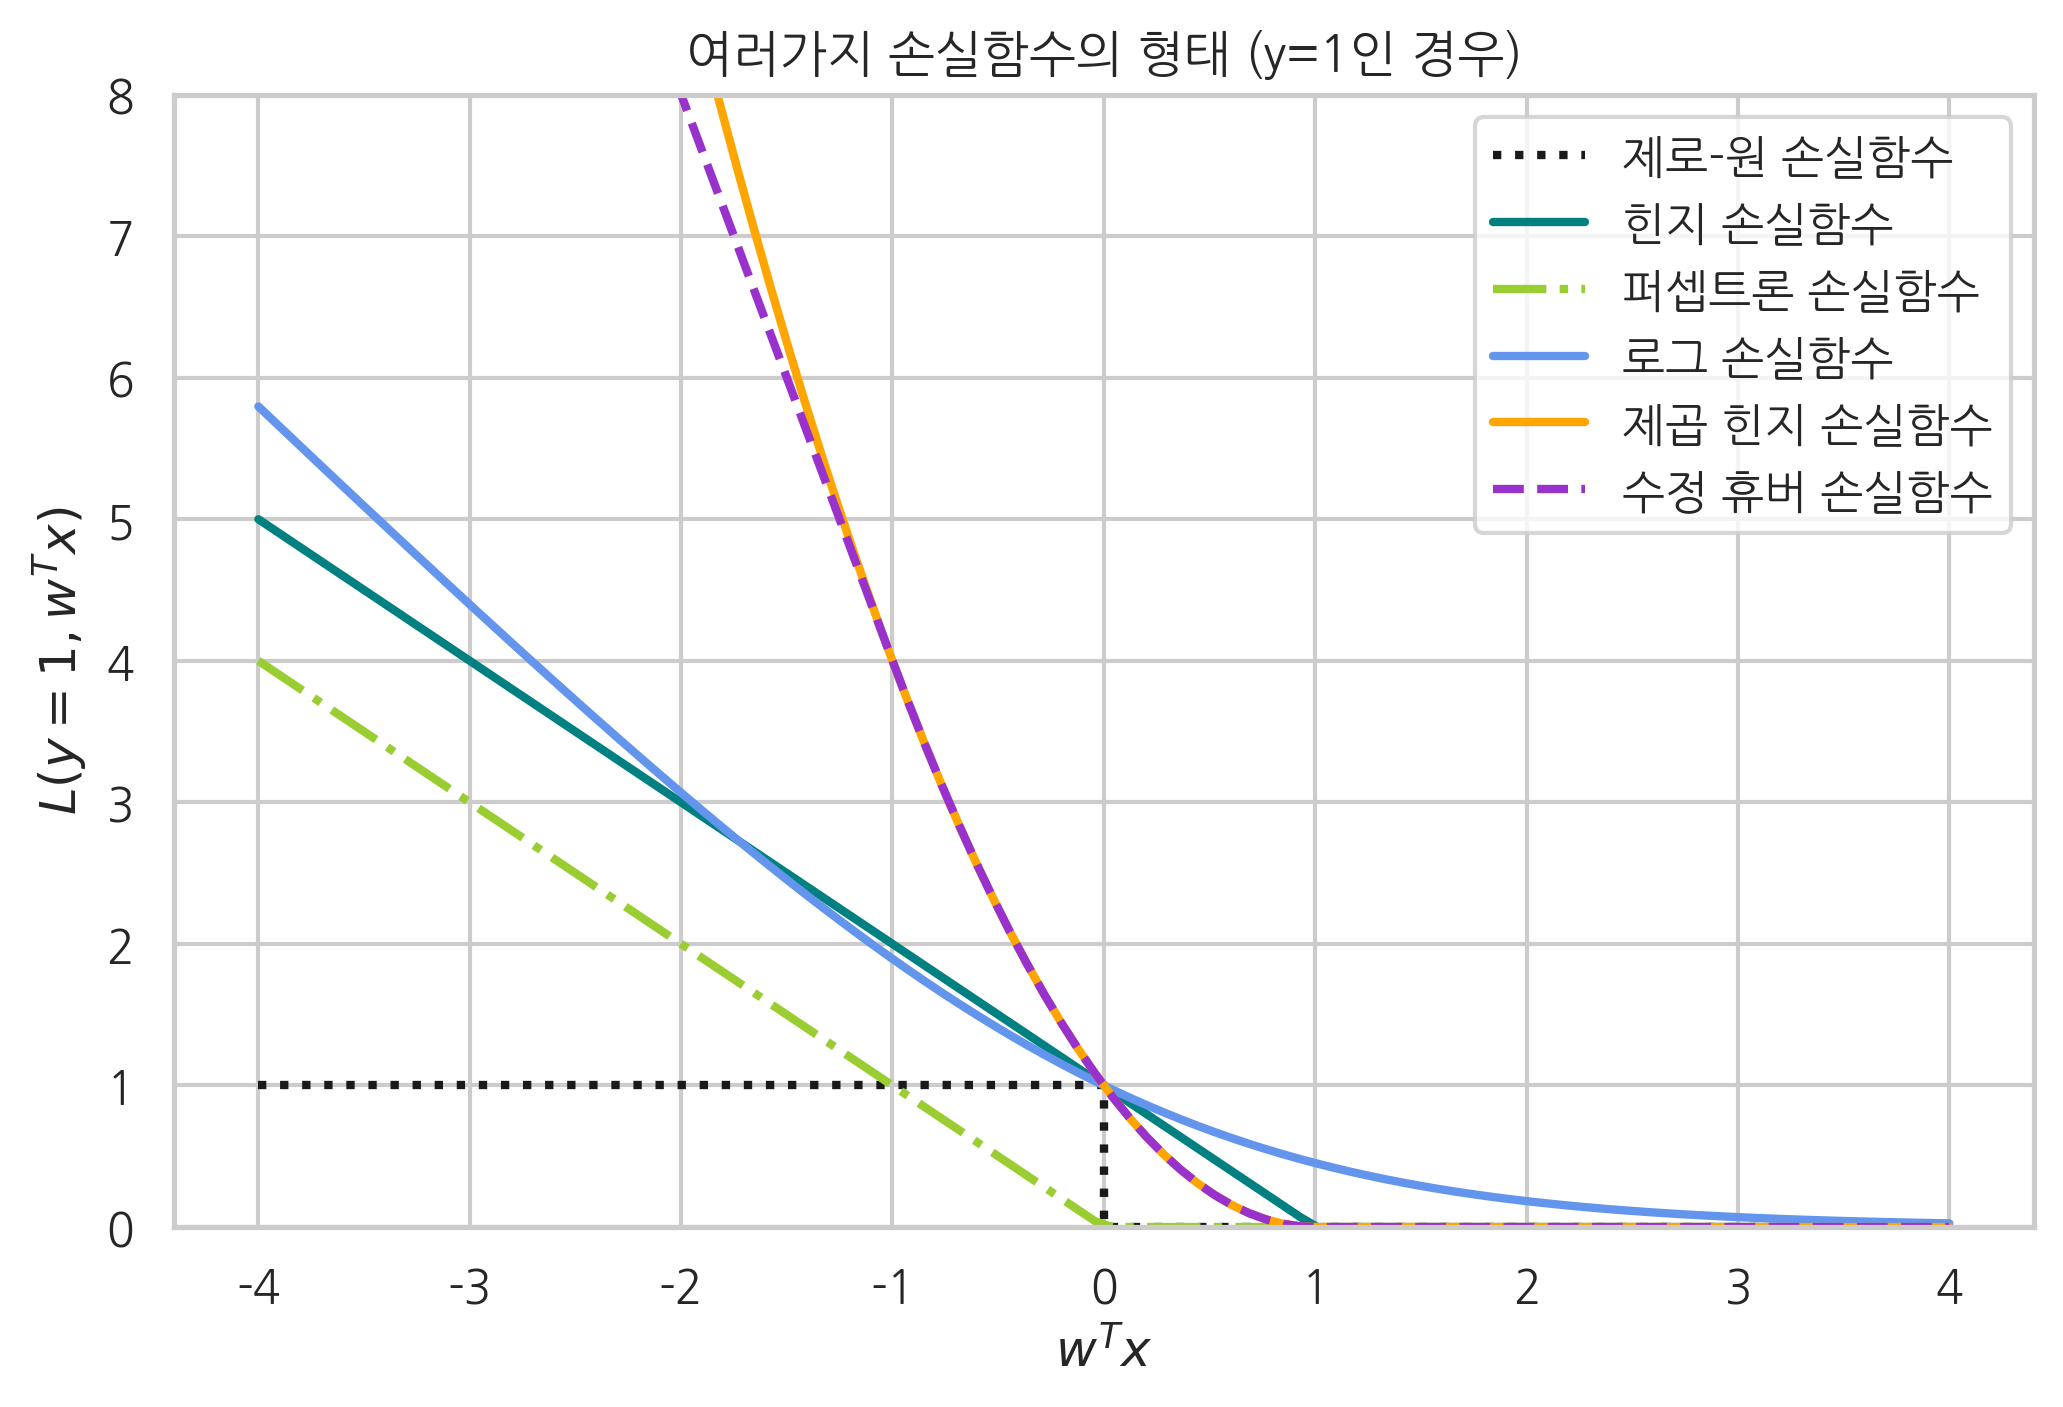

In [5]:
def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.] = 0
    return loss

xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color='k', lw=2, ls=":", label="제로-원 손실함수")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color='teal', lw=2, ls="-", label="힌지 손실함수")
plt.plot(xx, -np.minimum(xx, 0), color='yellowgreen', lw=2, ls="-.", label="퍼셉트론 손실함수")
plt.plot(xx, np.log2(1 + np.exp(-xx)), color='cornflowerblue', lw=2, label="로그 손실함수")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0) ** 2, color='orange', lw=2, label="제곱 힌지 손실함수")
plt.plot(xx, modified_huber_loss(xx, 1), color='darkorchid', lw=2, ls='--', label="수정 휴버 손실함수")
plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"$w^Tx$")
plt.ylabel(r"$L(y=1, w^Tx)$")
plt.title("여러가지 손실함수의 형태 (y=1인 경우)")
plt.show()


In [16]:
# 퍼셉트론 손실함수는 0.1이 나와도 맞은 것으로 처리한다.
    # 1이라는 값이 나오기 전까지는 어느정도 틀린 것으로 보자며 오른쪽으로 밀어버린 게 힌지 손실함수
    # 그걸 곡선형태로 만든 것이 제곱힌지 손실함수와 수정 휴버 손실함수
    # 로그 손실함수는 아주 플러스가 많이 나오기 전까지는 다 어느 정도로 손실함수를 주자한 것. 그래서 원래 1이 되는 것은 가능한한 왼쪽으로 밀어버리자
# 가장 많이 쓰는 것은 제곱힌지 손실함수와 수정 휴버 손실함수

## Scikit-Learn 의 SGD 구현

Scikit-Learn에서 제공하는 `SGDClassifier` 클래스는 `Perceptron` 클래스에의 입력 인수 이외에도 손실함수를 결정하는 `loss` 인수를 가진다. 가능합 값은  `hinge`, `perceptron`, `log`, `huber`, `modified_huber`, `squared_hinge` 등이다. 보통 `modified_huber`를 사용한다.

In [6]:
from sklearn.linear_model import SGDClassifier

def plot_sgd(n):
    model = SGDClassifier(loss="modified_huber", max_iter=n, shuffle=False, n_iter_no_change=1e9).fit(X, y)
    XX_min = X[:, 0].min() - 1
    XX_max = X[:, 0].max() + 1
    YY_min = X[:, 1].min() - 1
    YY_max = X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                         np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    cmap = mpl.colors.ListedColormap(sns.color_palette("Set2"))
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Set3)
    plt.scatter(X[y==0, 0], X[y==0, 1], c='w', s=100, marker='o', edgecolor='k')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='k', s=100, marker='x', edgecolor='k')
    plt.xlabel("꽃받침의 길이")
    plt.ylabel("꽃받침의 폭")
    plt.title("붓꽃 데이터(setosa/virginica)")
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.grid(False)
    plt.show()


from ipywidgets import widgets
widgets.interact(plot_sgd, n=widgets.IntSlider(min=1, max=100, step=1, value=1));

interactive(children=(IntSlider(value=1, description='n', min=1), Output()), _dom_classes=('widget-interact',)…

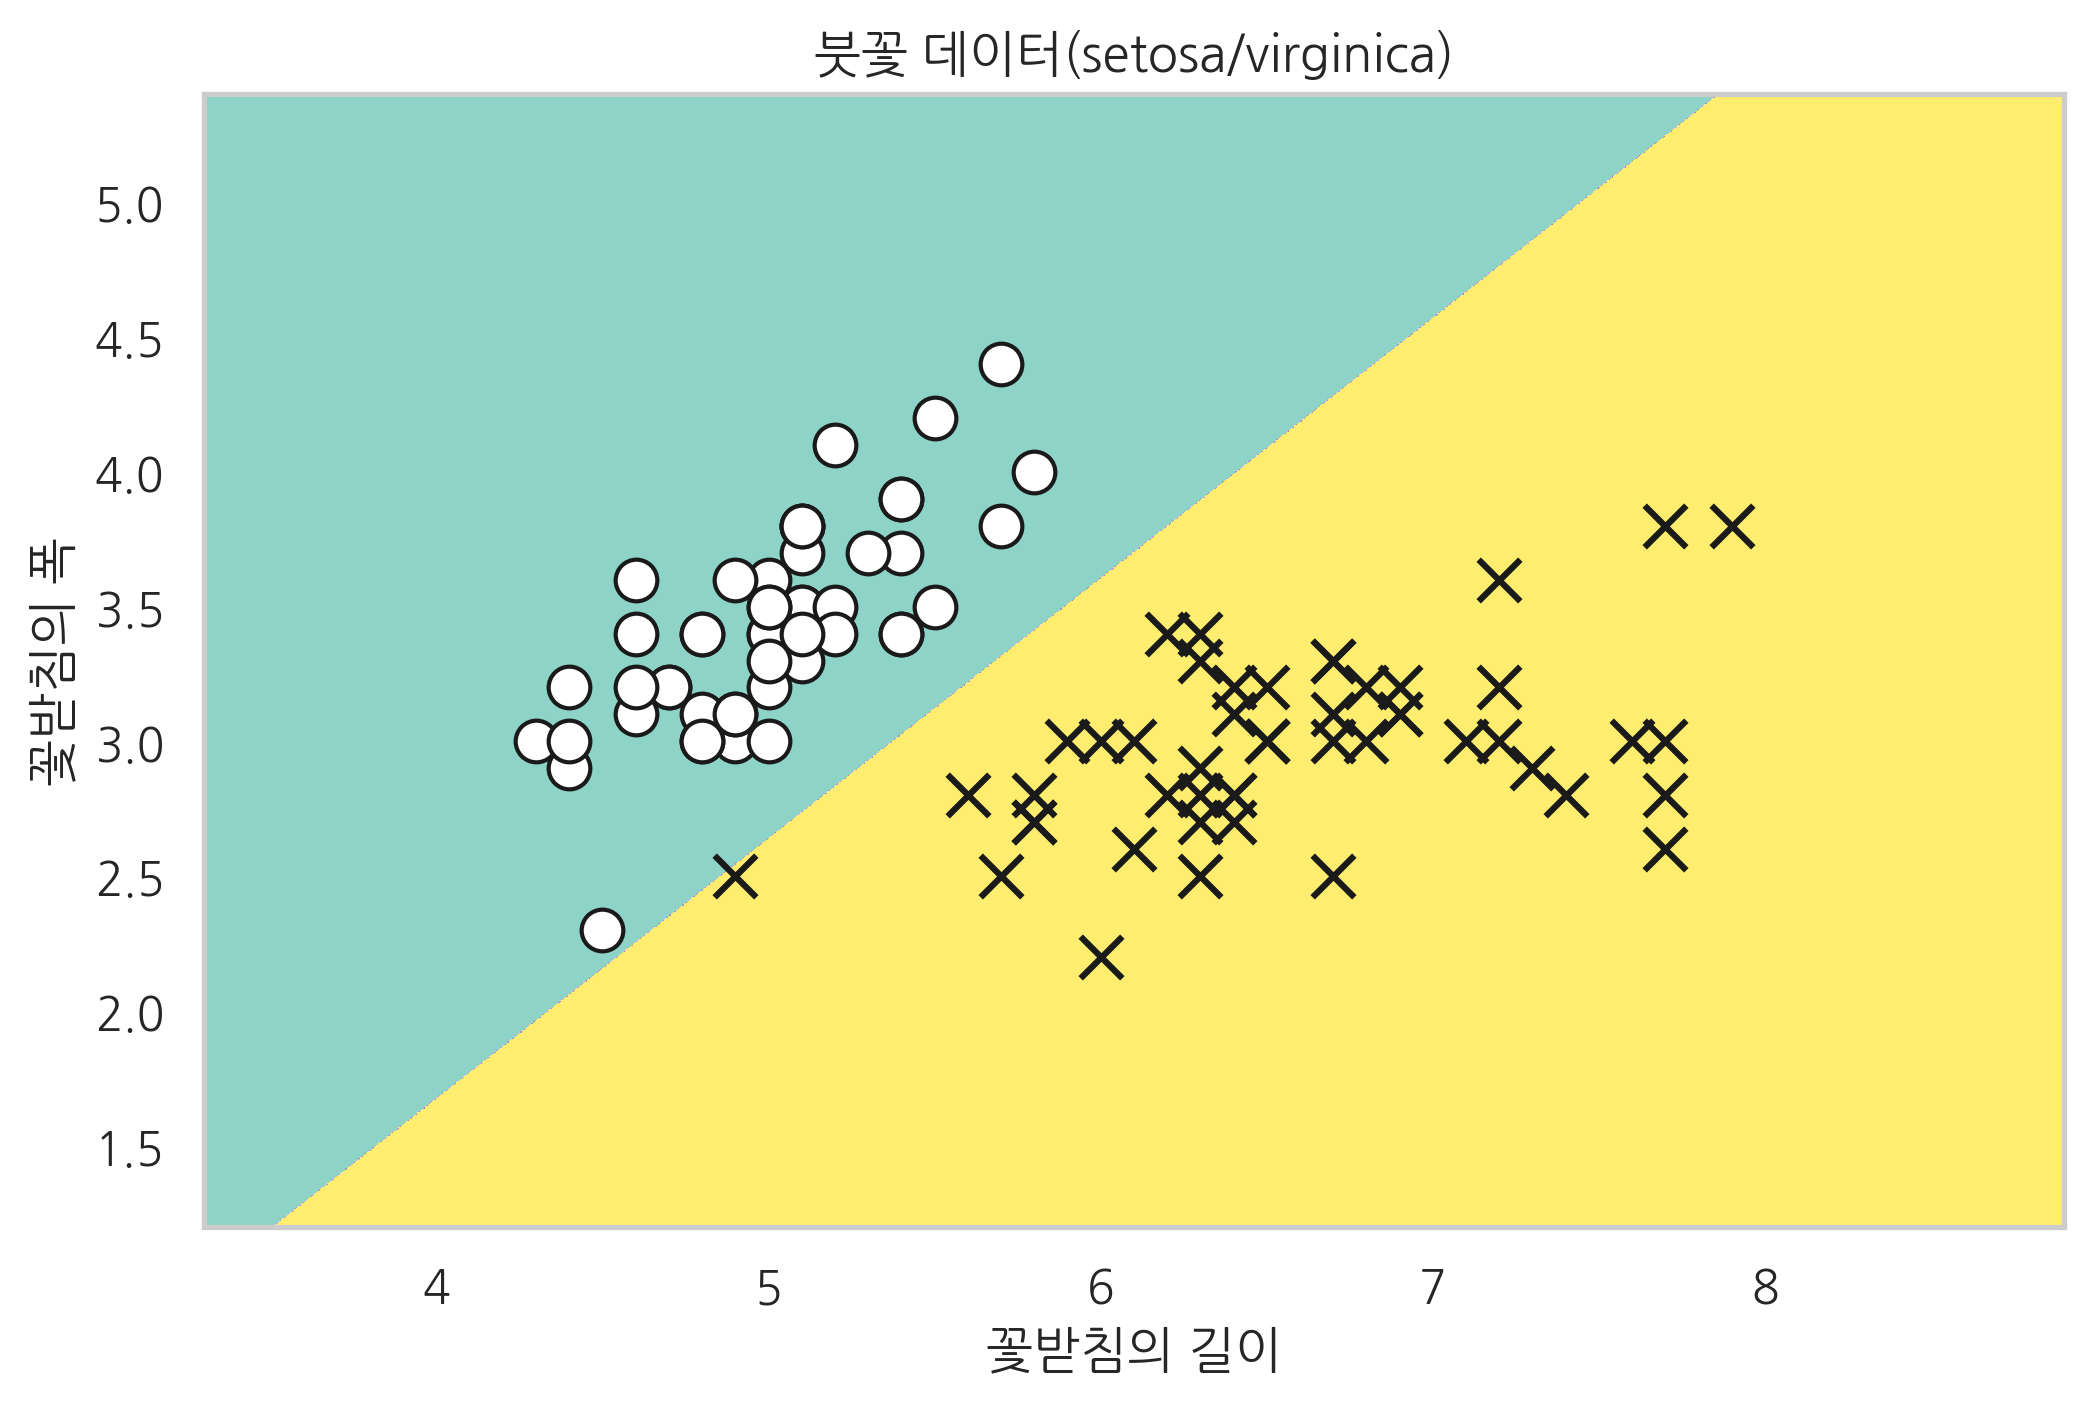

In [7]:
plot_sgd(400)

In [8]:
model = SGDClassifier(loss="modified_huber", max_iter=400, shuffle=False, n_iter_no_change=1e9).fit(X, y)
confusion_matrix(y, model.predict(X))

array([[50,  0],
       [ 0, 50]])

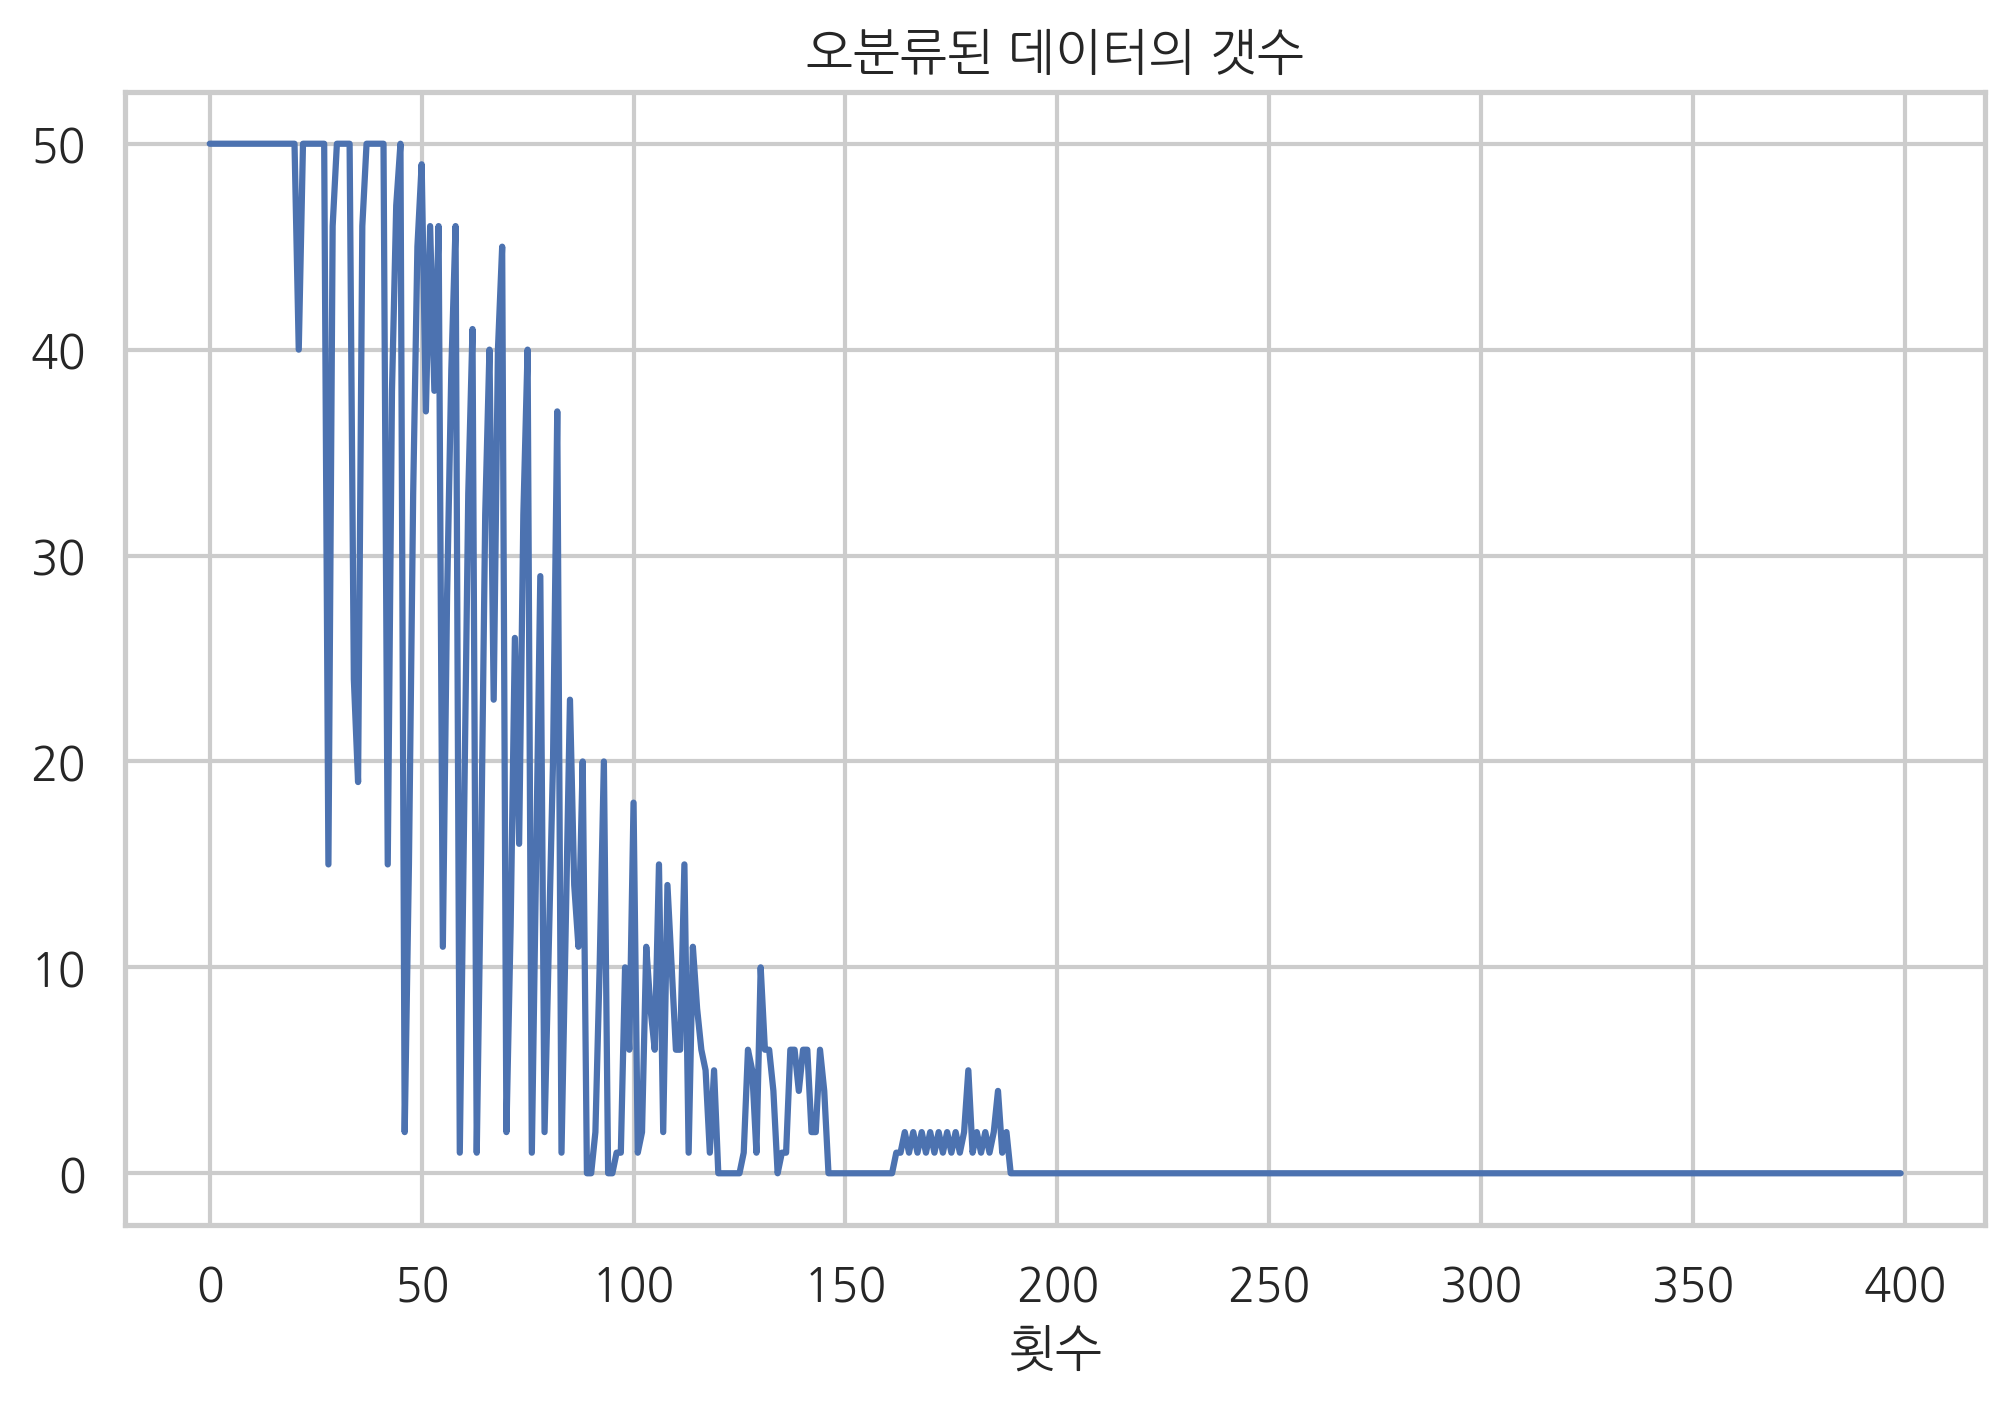

In [9]:
n = 400
loss = np.empty(n)
model = SGDClassifier(loss="modified_huber", shuffle=False)
for i in range(n):
    model.partial_fit(X, y, classes=[0, 1])
    loss[i] = np.sum(y != model.predict(X))

plt.plot(loss)
plt.xlabel("횟수")
plt.title("오분류된 데이터의 갯수")
plt.show()

In [17]:
# 퍼셉트론이 됐든 SGD가 됐든 가장 나쁜 문제점은 0으로 수렴이 끝나도 수렴이 끝난줄 모른다는 것.
# 이 상태에서도 잘못된 그레디언트 값이 나온다.
# 우리가 원래 쓰던 그레디언트 디센트에서는 최적점에 도달하게 되면 그레디언트 값이 0이 나온다
# 그런데 여기에서는 그레디언트 값을 올바르게 구하지 않고 대략적으로 구해서 0이 안 나올수도 있다.
# 그래서 SGD 방법, 인공신경망 딥러닝 방법에서는 그래프 추세를 우리가 모니터링하고 있어야 한다
# 그리고 어느 정도 수렴하는 것 같다 하면 수동으로 정지시켜야 함

In [22]:
# 퍼셉트론은 활성화함수와 손실함수가 비선형 함수다. 이런 것들 때문에 비선형이 생긴다
# 그런데 활성화함수에 들어가는 판별선(활성화 값)은 선형이다. 로지스틱회귀분석과 똑같다
# 로지스틱회귀분석에서는 활성화함수 대신 로지스틱함수를 썼을 뿐. 여기선 sign 함수를 쓰고. 이 차이 빼고는 똑같다
# 판별 경계선은 직선이고 차이점은 모양이 비선형일 뿐
    # 그래프를 해안선이라고 가정할 경우 로지스틱함수에서는 고도가 -1이었다가 판별선에서 0이 됐다가 +1이 된다
    # 퍼셉트론은 수심이 -1이었다가 갑자기 판별선 부근에서 퍽 튀어 나와서 +1 이렇게 되는 것